# TASK-2 Prediction using Unsupervised ML

    - From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
    - Use R or Python to perform this task.

In [1]:
# Importing Libraries
# To load the data
from sklearn import datasets

# To Visualise the data
import matplotlib.pyplot as plt

# To handle the data structure include importing operation
import pandas as pd

# To do numirical calculations
import numpy as np

# To Identify the number of clusters
from sklearn.cluster import KMeans

# To handle visualisation parameters
import matplotlib.patches as mpatches

# To evaluate the models
import sklearn.metrics as sm

# To make 3d Plot
from mpl_toolkits.mplot3d import Axes3D

# To Conform the no of Clusters  
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN

# To make the clusters (Principle componant analysis)
from sklearn.decomposition import PCA

In [2]:
# Load the data
iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# split the data
x = iris.data
y = iris.target

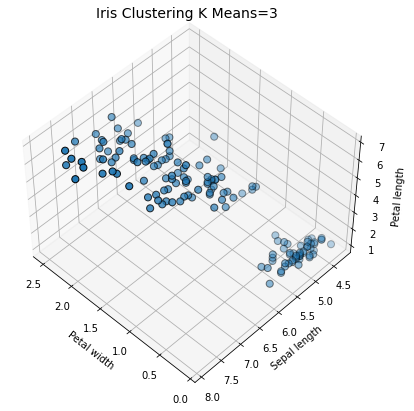

In [6]:
# Visualizing the input data and its hierarchy using 3D plot

fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:,3], x[:,0], x[:,2], edgecolor='k', s=50)
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.title('Iris Clustering K Means=3', fontsize=14)
plt.show()

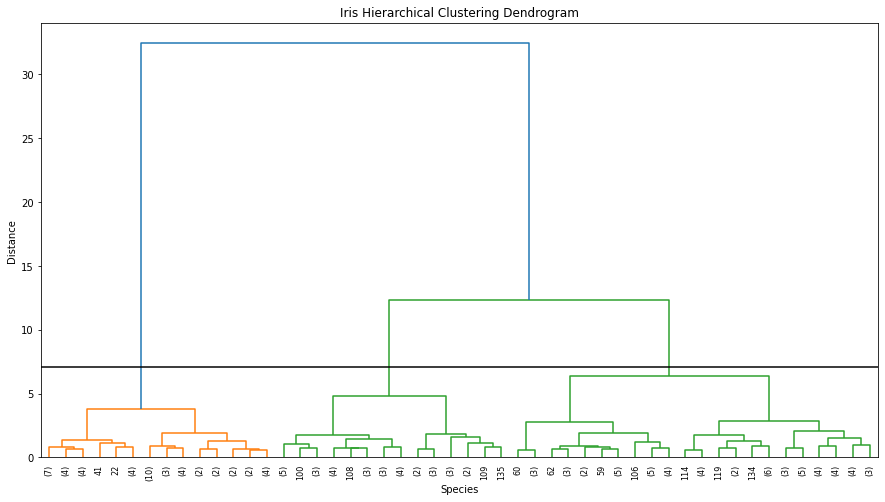

In [7]:
# Hierarchy Clustering Dindogram

hier = linkage(x, 'ward')
max_d = 7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(hier, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=8,) 
plt.axhline(y=max_d, c='k')
plt.show()

In [8]:
# Data Preprocessing for model building

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']) 
y = pd.DataFrame(iris.target, columns=['Target']) 
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [10]:
# Model Training

kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(x)
print(kmeans_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [11]:
print(kmeans_model.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


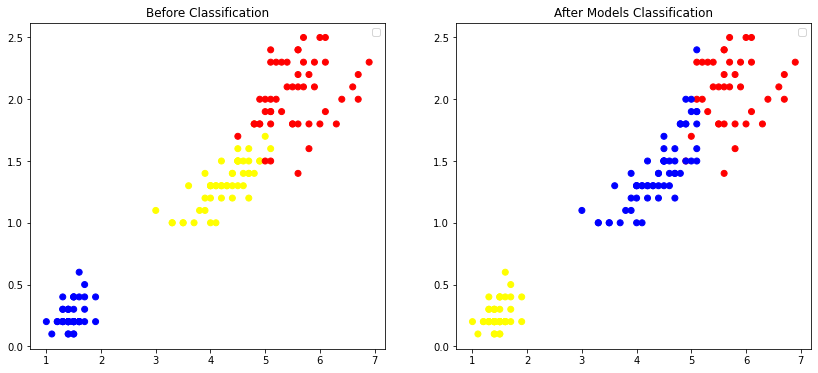

In [12]:
# visualise the clusters to see the changes
plt.figure(figsize=(14,6))

colors = np.array(['blue' , 'yellow' , 'red'])

predictedY = np.choose(kmeans_model.labels_, [1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before Classification')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title('After Models Classification')
plt.legend()
plt.show()

In [13]:
# see the model accurecy
sm.accuracy_score(predictedY, y['Target'])

0.24

In [14]:
# Model not working well bad to see but positive things are we ave the classes.
# Confusion Matrix

sm.confusion_matrix(predictedY, y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

# Continue Learning........................